In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = "archive/train"
test_dir = "archive/test"

# Image preprocessing (rescale pixels 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),   # resize all images to 48x48
    batch_size=64,
    color_mode="grayscale", # dataset is grayscale
    class_mode="categorical"
)

# Load test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

# Check class labels mapping
print(train_generator.class_indices)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Data Augmentation


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixels
    rotation_range=30,     # rotate images ±30°
    width_shift_range=0.2, # horizontal shift
    height_shift_range=0.2,# vertical shift
    shear_range=0.2,       # shear transformation
    zoom_range=0.2,        # zoom in/out
    horizontal_flip=True,  # flip left-right
    fill_mode='nearest'    # fill empty pixels
)

# Update generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.


In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=25
)


Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.2416 - loss: 1.8328 - val_accuracy: 0.2487 - val_loss: 1.7916
Epoch 2/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.2812 - loss: 1.7597

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2812 - loss: 1.7597 - val_accuracy: 0.2486 - val_loss: 1.7905
Epoch 3/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.2549 - loss: 1.7912 - val_accuracy: 0.2623 - val_loss: 1.7758
Epoch 4/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3438 - loss: 1.7907 - val_accuracy: 0.2600 - val_loss: 1.7741
Epoch 5/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.2610 - loss: 1.7778 - val_accuracy: 0.2899 - val_loss: 1.7245
Epoch 6/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2500 - loss: 1.8568 - val_accuracy: 0.2882 - val_loss: 1.7297
Epoch 7/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.2725 - loss: 1.7550 - val_accuracy: 0.3260 - val_loss: 1.6665
Epoch 8/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3750 - loss: 1.7594 - val_accuracy: 0.3216 - val_loss: 1.6708
Epoch 9/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.2942 - loss: 1.7157 - val_accuracy: 0.342

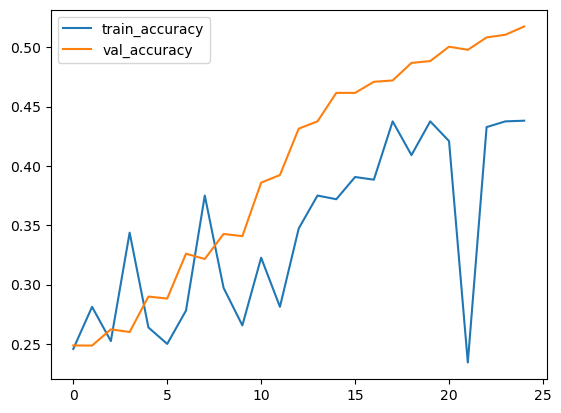

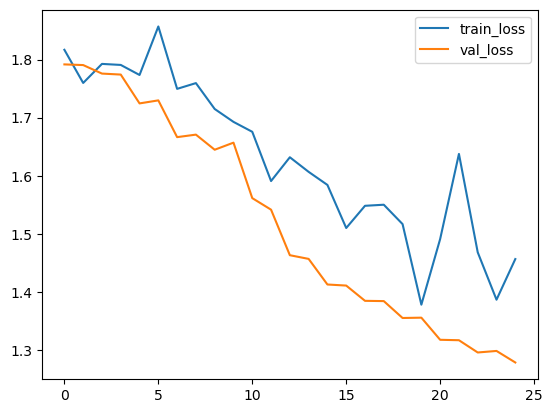

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [23]:
model.save('emotion_cnn.h5')
